In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import r2_score, silhouette_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

filePath = "/content/wine.data"

In [ ]:
df = pd.read_csv(filePath, names=  range(14))
df
#sns.pairplot(df)

0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17  1185  
3    3.45  1480  
4    2.93   735  
..    ...   ...  
173  1.74   740  
174  1.56   750  
175  1.56   835  
176  1.62   840  
177  1.60   560  

[178 rows x 14 columns]

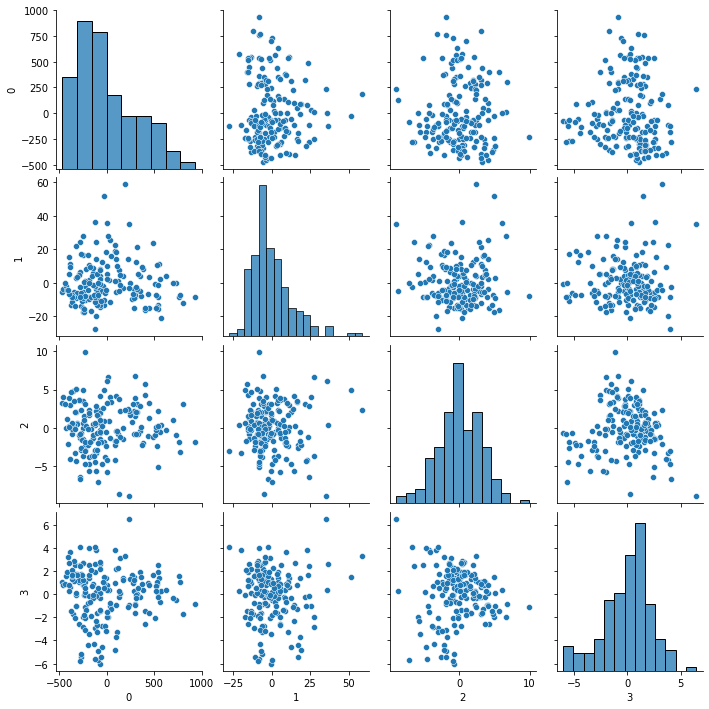

In [ ]:
y = df[0]
x = df.drop(0, axis = 1)

pca = PCA(n_components = 4)
x = pca.fit_transform(x)
x = pd.DataFrame(x)
sns.pairplot(x)

b]

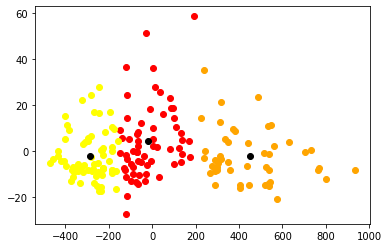

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(x)
x_arr = x.to_numpy()

plt.scatter(x_arr[y_kmeans == 0, 0], x_arr[y_kmeans == 0, 1], c = 'red')
plt.scatter(x_arr[y_kmeans == 1, 0], x_arr[y_kmeans == 1, 1], c = 'orange')
plt.scatter(x_arr[y_kmeans == 2, 0], x_arr[y_kmeans == 2, 1], c = 'yellow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black')
plt.show()

c]

0.5713166560504727
0.5608311232090102
0.5493225618468746
0.5659785516251054
0.5621123356050797
0.5413923324116807
0.5282688001135135
3


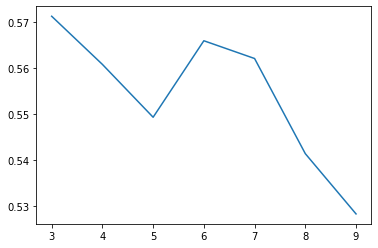

In [ ]:
l = []
for i in range(3, 10):
    temp = KMeans(n_clusters = i)#, max_iter = 100)
    temp_y = temp.fit_predict(x)
    l.append(silhouette_score(x_arr, temp.labels_))
    print(l[i - 3])

plt.plot(range(3, 10), l)
print(l.index(max(l)) + 3)


d]

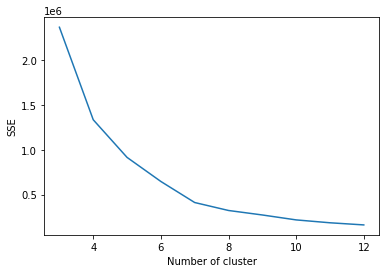

In [ ]:
sses = []
for i in range(3,13):
    kmeans2 = KMeans(n_clusters= i, max_iter=100)
    Y_km= kmeans2.fit_predict(x)
    sses.append(kmeans2.inertia_)

plt.figure()
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.plot(range(3,13), sses)
plt.show()

#Q2]

In [ ]:
filePathTrain = "/content/drive/MyDrive/fashion-mnist_train.csv"
filePathTest = "/content/drive/MyDrive/fashion-mnist_test.csv"

df_train = pd.read_csv(filePathTrain)
df_test = pd.read_csv(filePathTest)

x_train = df_train.drop('label', axis = 1)
y_train = df_train.label

x_test = df_test.drop('label', axis = 1)
y_test = df_test.label


In [ ]:
x_train.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df_train.head(11)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       2       0       0       0       0       0       0       0       0   
1       9       0       0       0       0       0       0       0       0   
2       6       0       0       0       0       0       0       0       5   
3       0       0       0       0       1       2       0       0       0   
4       3       0       0       0       0       0       0       0       0   
5       4       0       0       0       5       4       5       5       3   
6       4       0       0       0       0       0       0       0       0   
7       5       0       0       0       0       0       0       0       0   
8       4       0       0       0       0       0       0       3       2   
9       8       0       0       0       0       0       0       0       0   
10      0       0       0       0       0       1       0       0       0   

    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0        30        43         0   
3        0  ...         3         0         0         0         0         1   
4        0  ...         0         0         0         0         0         0   
5        5  ...         7         8         7         4         3         7   
6        0  ...        14         0         0         0         0         0   
7        0  ...         0         0         0         0         0         0   
8        0  ...         1         0         0         0         0         0   
9        0  ...       203       214       166         0         0         0   
10       0  ...       164       177       163         0         0         1   

    pixel781  pixel782  pixel783  pixel784  
0          0         0         0         0  
1          0         0         0         0  
2          0         0         0         0  
3          0         0         0         0  
4          0         0         0         0  
5          5         0         0         0  
6          0         0         0         0  
7          0         0         0         0  
8          0         0         0         0  
9          0         0         0         0  
10         0         0         0         0  

[11 rows x 785 columns]

In [ ]:
df_train.label.value_counts()
x_train.shape

(60000, 784)

1] 2]

In [ ]:
k = int(input("Number of Clusters: "))
n_iter = int(input("Maximum desired number of iterations: "))
centroids = []
indx = x_train.index
for i in range(k):
    temp = int(input("Index of i th initial Centroid: "))
    centroids.append(x_train.loc[indx[temp]])

print(len(centroids), len(centroids[0]))

Number of Clusters: 10
Maximum desired number of iterations: 100
Index of i th initial Centroid: 0
Index of i th initial Centroid: 1
Index of i th initial Centroid: 2
Index of i th initial Centroid: 3
Index of i th initial Centroid: 4
Index of i th initial Centroid: 5
Index of i th initial Centroid: 6
Index of i th initial Centroid: 7
Index of i th initial Centroid: 8
Index of i th initial Centroid: 9
10 784


In [ ]:
def FindDist(x, y):
    dist = np.linalg.norm(x - y)
    return dist

def FindCen(l, centroids):
    # tempInd = 0
    # temp = 1e30
    # for i in range(len(centroids)):
    #     if(temp > FindDist(centroids[i], l)):
    #         temp = FindDist(centroids[i], l)
    #         tempInd = i
    # return tempInd
    temp = []
    for i in range(k):
        temp.append(FindDist(l, centroids[i]))
    return temp.index(min(temp))

groups = [[] for i in range(k)]


#print(len(groups), len(groups[1]), len(groups[0][0]))

In [ ]:
for i in x_train.values:
    groups[FindCen(i, centroids)].append(i)

In [ ]:
x_train.head(11)

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0        0       0       0       0       0       0       0       0       0   
1        0       0       0       0       0       0       0       0       0   
2        0       0       0       0       0       0       0       5       0   
3        0       0       0       1       2       0       0       0       0   
4        0       0       0       0       0       0       0       0       0   
5        0       0       0       5       4       5       5       3       5   
6        0       0       0       0       0       0       0       0       0   
7        0       0       0       0       0       0       0       0       0   
8        0       0       0       0       0       0       3       2       0   
9        0       0       0       0       0       0       0       0       0   
10       0       0       0       0       1       0       0       0       0   

    pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0         0  ...         0         0         0         0         0         0   
1         0  ...         0         0         0         0         0         0   
2         0  ...         0         0         0        30        43         0   
3         0  ...         3         0         0         0         0         1   
4         0  ...         0         0         0         0         0         0   
5         6  ...         7         8         7         4         3         7   
6         0  ...        14         0         0         0         0         0   
7         0  ...         0         0         0         0         0         0   
8         0  ...         1         0         0         0         0         0   
9         0  ...       203       214       166         0         0         0   
10       41  ...       164       177       163         0         0         1   

    pixel781  pixel782  pixel783  pixel784  
0          0         0         0         0  
1          0         0         0         0  
2          0         0         0         0  
3          0         0         0         0  
4          0         0         0         0  
5          5         0         0         0  
6          0         0         0         0  
7          0         0         0         0  
8          0         0         0         0  
9          0         0         0         0  
10         0         0         0         0  

[11 rows x 784 columns]

In [ ]:
groups[0]

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
          0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
        255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
        214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0, 214, 222, 210, 213, 224

In [ ]:
a = [1,2,3]
b = []
b.append(a)
b[0][2] = 6
a

[1, 2, 6]

In [ ]:
def Avg(l):
    if(len(l) == 0):
        return np.zeros(784)

    ans = l[0]
    for i in range(1, len(l)):
        ans += l[i]
    
    return (ans/len(l))

# for i in range(k):
#     centroids[i] = np.average(np.array((groups[i])), axis = 0)


In [ ]:
def refresh(l):
    len1 = len(l)
    l = [[] for i in range(len1)]
    return l

In [ ]:
for i in range(n_iter):
    for j in range(k):
        centroids[j] = np.average(np.array(groups[j]), axis = 0)

    groups = refresh(groups)
    
    for j in x_train.values:
        groups[FindCen(j, centroids)].append(j)


In [ ]:
groups1 = groups

In [ ]:
for i in range(10):
    print(len(groups[i]))

2367
6325
6842
3977
7365
10000
5182
11196
4186
2560


d]

Cluster Center: 0


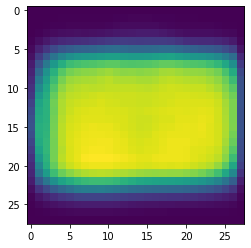


Cluster Center: 1


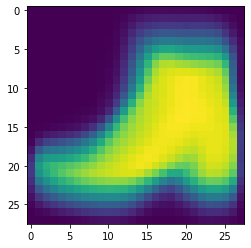


Cluster Center: 2


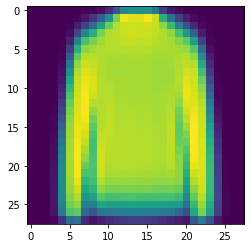


Cluster Center: 3


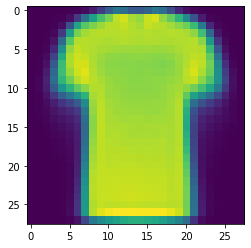


Cluster Center: 4


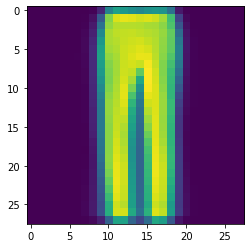


Cluster Center: 5


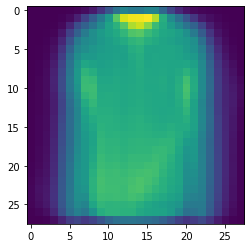


Cluster Center: 6


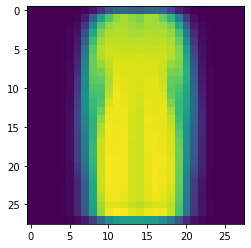


Cluster Center: 7


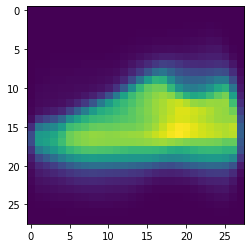


Cluster Center: 8


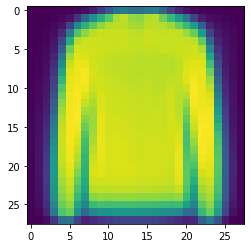


Cluster Center: 9


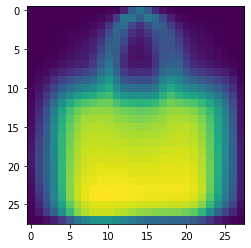

In [ ]:
for i in range(k):
  data = np.reshape(np.average(groups[i], axis=0),(28,28))
  print('Cluster Center:', i)
  plt.imshow(data, interpolation='nearest')
  plt.show()
  print()

e]

Cluster: 0


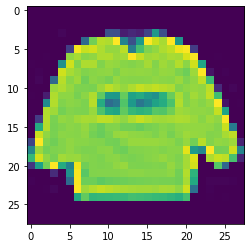

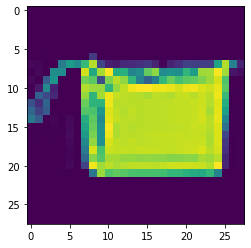

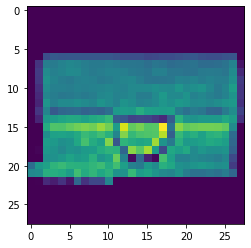

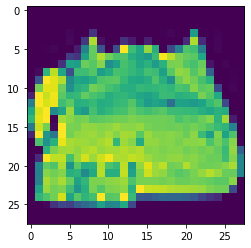

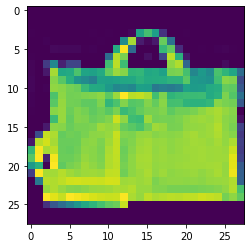

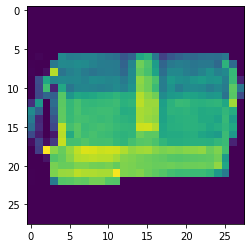

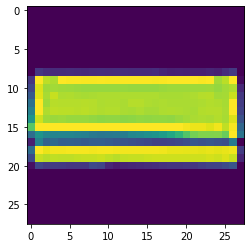

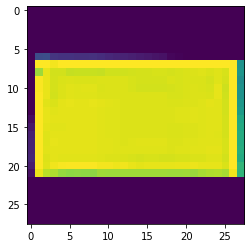

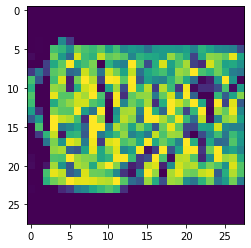

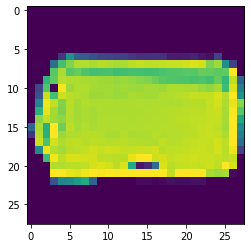


Cluster: 1


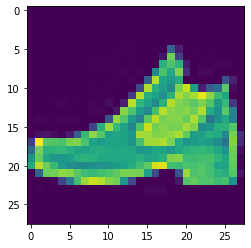

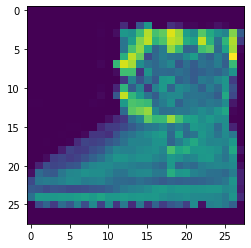

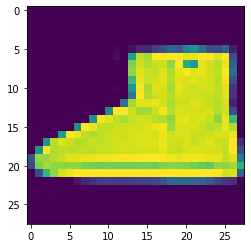

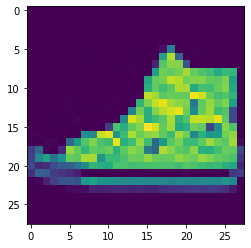

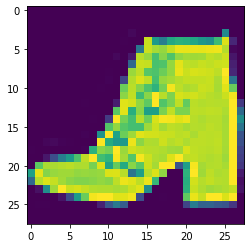

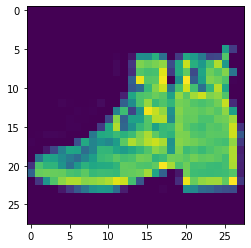

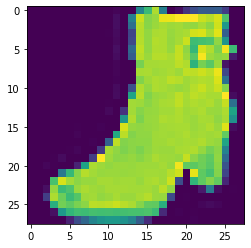

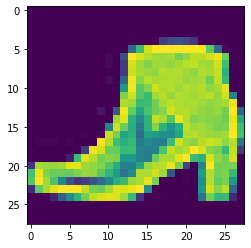

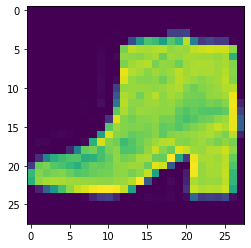

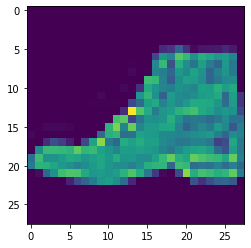


Cluster: 2


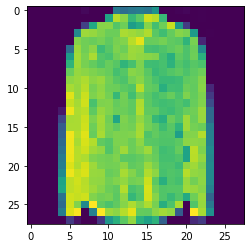

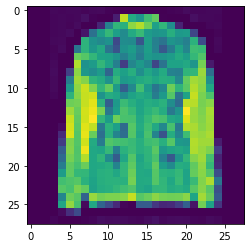

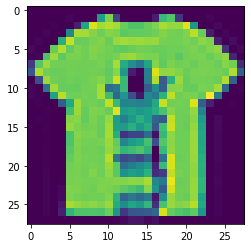

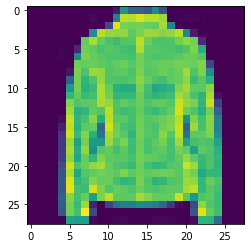

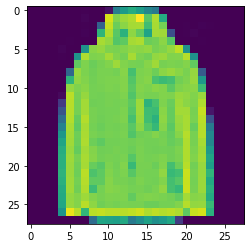

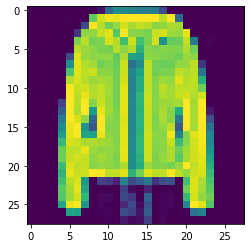

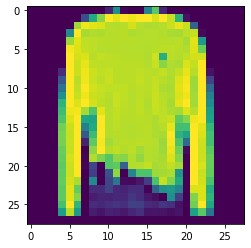

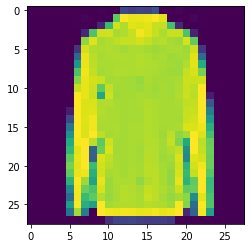

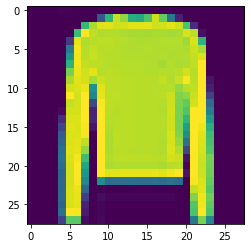

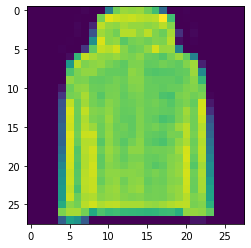


Cluster: 3


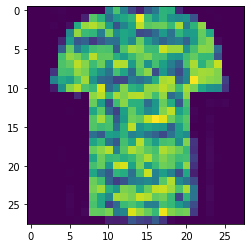

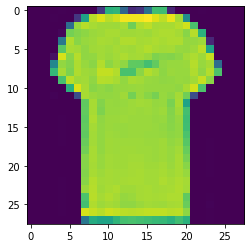

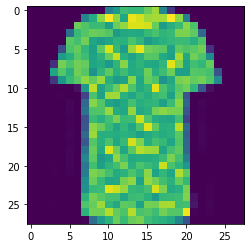

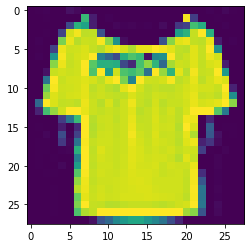

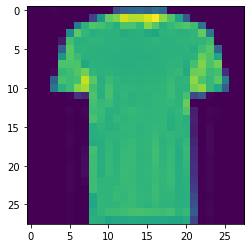

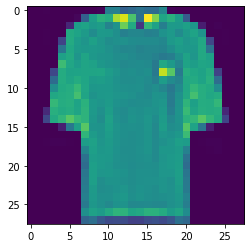

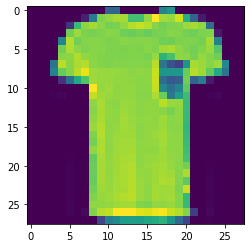

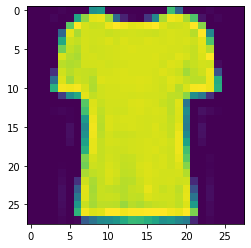

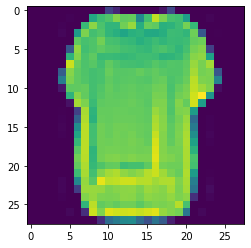

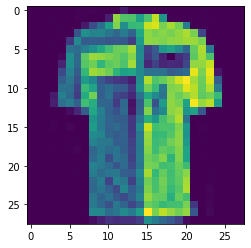


Cluster: 4


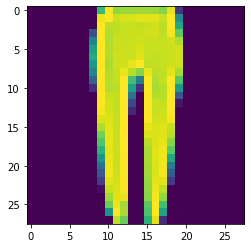

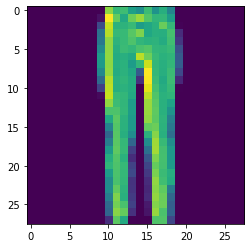

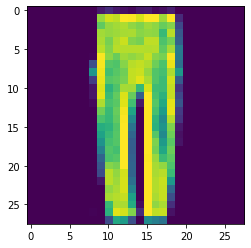

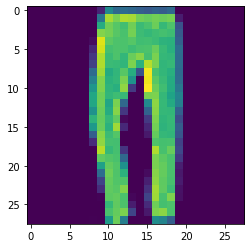

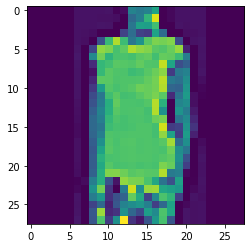

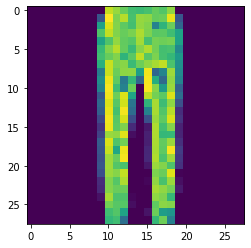

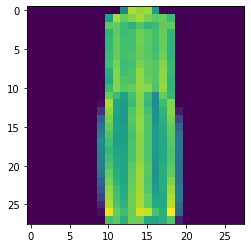

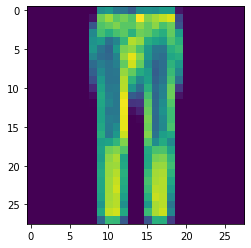

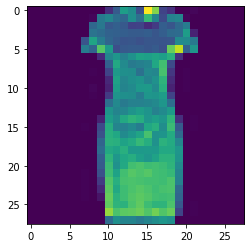

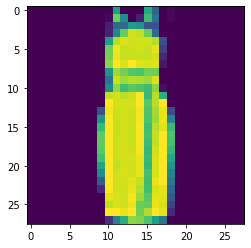


Cluster: 5


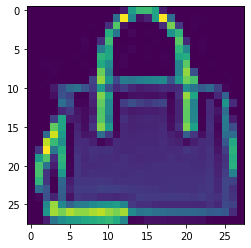

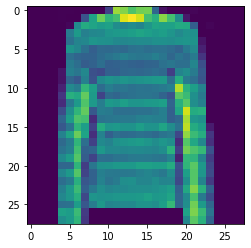

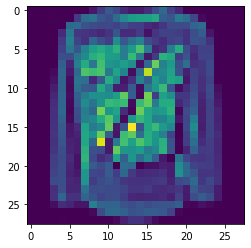

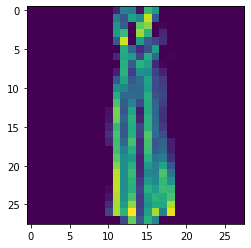

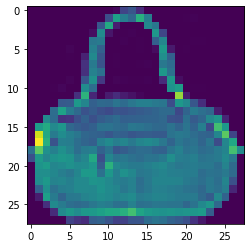

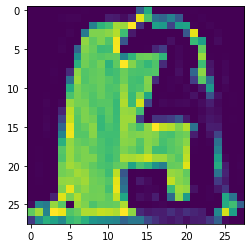

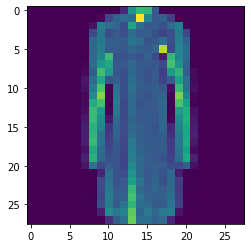

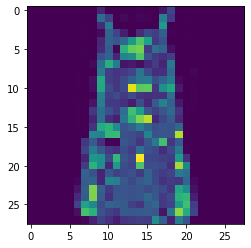

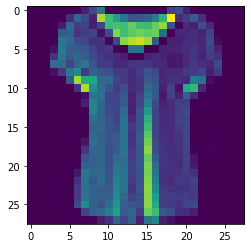

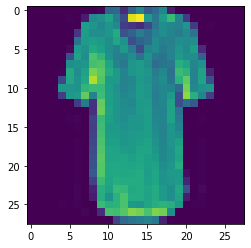


Cluster: 6


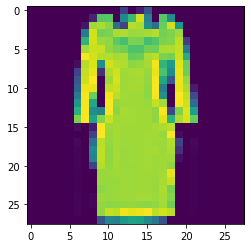

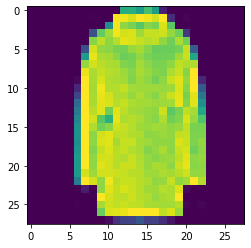

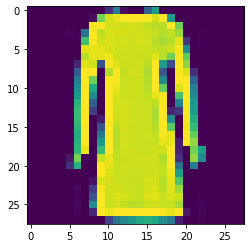

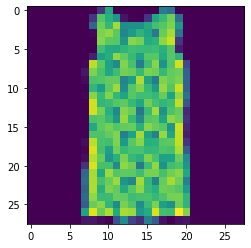

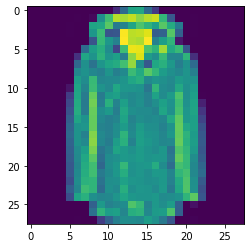

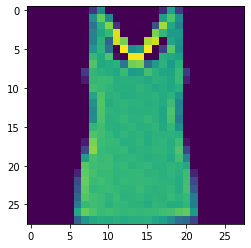

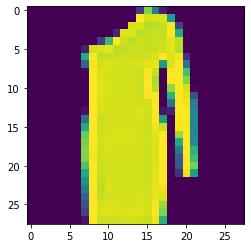

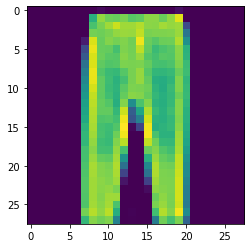

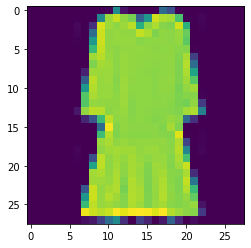

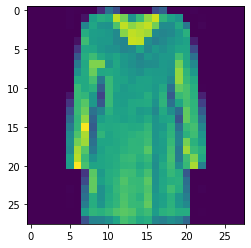


Cluster: 7


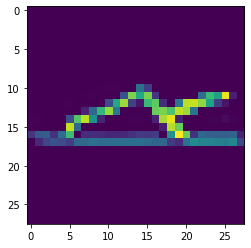

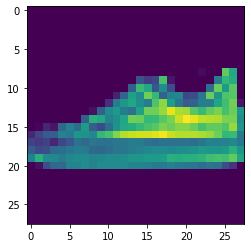

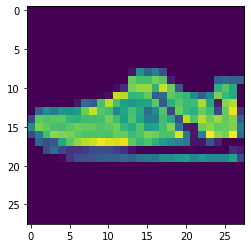

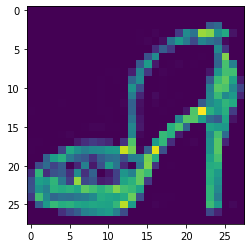

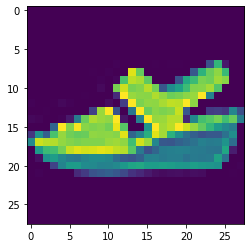

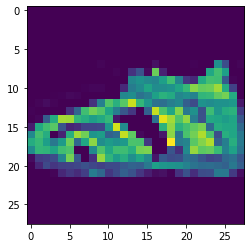

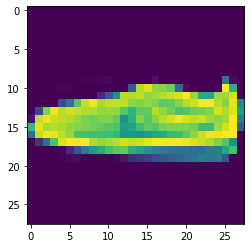

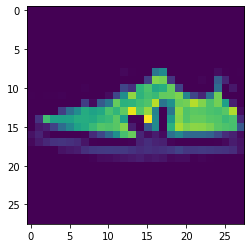

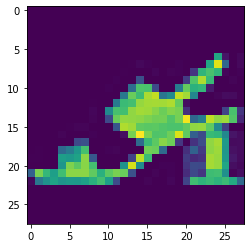

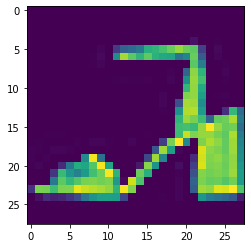


Cluster: 8


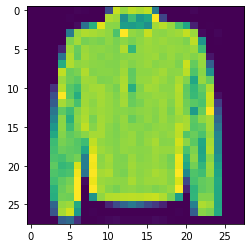

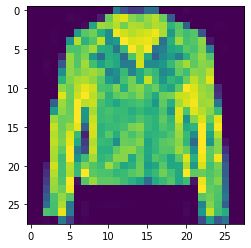

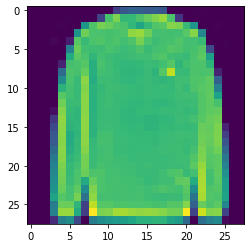

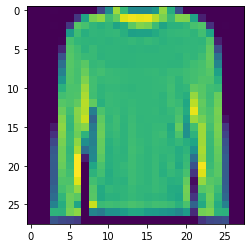

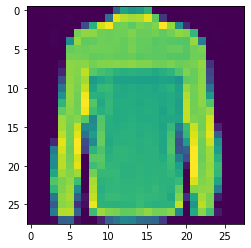

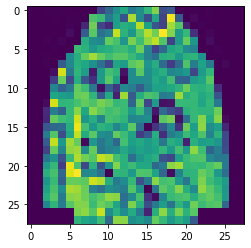

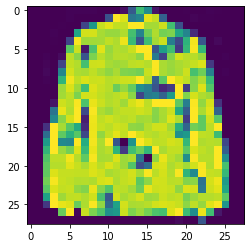

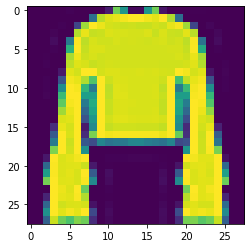

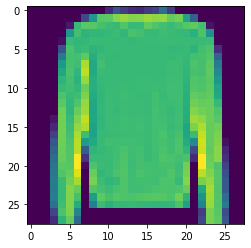

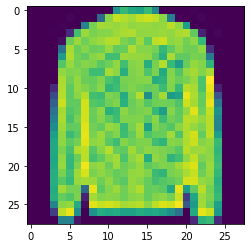


Cluster: 9


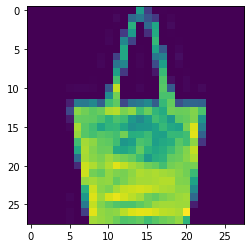

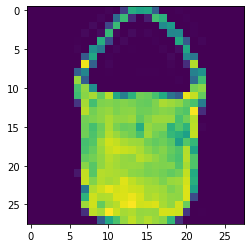

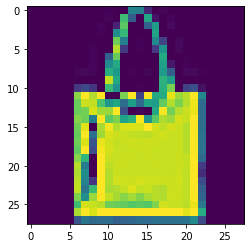

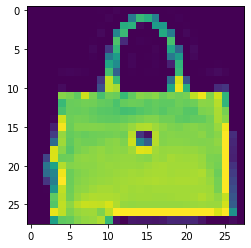

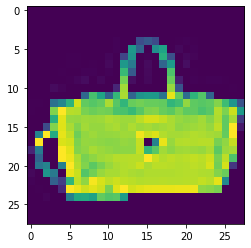

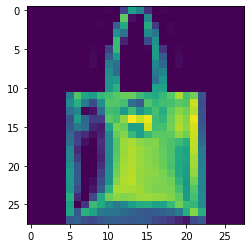

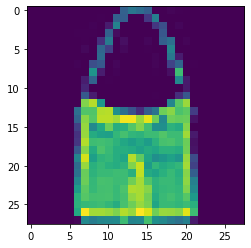

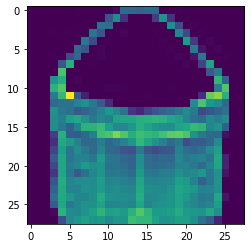

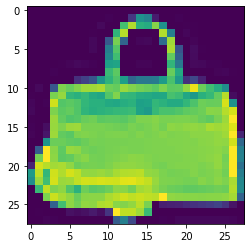

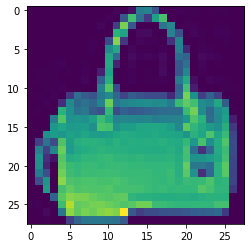

In [ ]:
tempCount = 0
for i in groups: 
  print("Cluster:", tempCount)
  tempCount+=1
  for j in range(10):
    data = np.reshape(i[j],(28,28))
    plt.imshow(data, interpolation='nearest')
    plt.show()
    print()

f]

In [ ]:
x_train=  pd.read_csv(filePathTrain).drop('label', axis = 1)
x_train

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       5       0   
3           0       0       0       1       2       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995       0       0       0       0       0       0       0       0       0   
59996       0       0       0       0       0       0       0       0       0   
59997       0       0       0       0       0       0       0       0       0   
59998       0       0       0       0       0       0       0       0       0   
59999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0        30        43   
3            0  ...         3         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
59995        0  ...         0         0         0         0         0   
59996        0  ...        73         0         0         0         0   
59997        0  ...       160       162       163       135        94   
59998        0  ...         0         0         0         0         0   
59999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 784 columns]

In [ ]:
groups = refresh(groups)
indx = x_train.index
centroids = []

for i in range(k):
    tempdf = x_train[y_train == i]
    centroids.append(tempdf.values[0])
    
centroids

[array([  0,   0,   0,   1,   2,   0,   0,   0,   0,   0, 114, 183, 112,
         55,  23,  72, 102, 165, 160,  28,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,  24, 188, 163,  93,
        136, 153, 168, 252, 174, 136, 166, 130, 123, 131,  66,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   2,   0,  10, 157, 216, 226,
        208, 142,  66, 115, 149, 230, 190, 196, 198, 172, 222, 107, 165,
        211,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 118, 214,
        174, 168, 109, 200, 124, 150, 143,  58,  63,  89, 137,  97, 168,
        138, 142, 195, 156,   0,   0,   0,   0,   0,   0,   0,   0,  25,
        140,  70,  80,  43,  71,  96,  93, 151, 121, 197, 143, 107,  82,
        101, 111,  80, 137, 193, 208,   6,   0,   0,   0,   0,   0,   0,
          0,  74, 194, 107, 146, 178, 185, 182,  77, 185, 218, 210, 175,
        174, 235, 217, 217, 129, 180, 210, 208,  89,   0,   0,   0,   0,
          0,   0,   0, 179, 213, 203, 177, 228, 192

In [ ]:
x_train

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       5       0   
3           0       0       0       1       2       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995       0       0       0       0       0       0       0       0       0   
59996       0       0       0       0       0       0       0       0       0   
59997       0       0       0       0       0       0       0       0       0   
59998       0       0       0       0       0       0       0       0       0   
59999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0        30        43   
3            0  ...         3         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
59995        0  ...         0         0         0         0         0   
59996        0  ...        73         0         0         0         0   
59997        0  ...       160       162       163       135        94   
59998        0  ...         0         0         0         0         0   
59999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 784 columns]

In [ ]:
for i in range(n_iter):
    groups = refresh(groups)
    
    for j in x_train.values:
        groups[FindCen(j, centroids)].append(j)

    for j in range(k):
        centroids[j] = np.average((groups[j]), axis = 0)

    
for i in groups:
    print(len(i))

3795
7787
2351
5174
7596
7650
9710
7534
2571
5832


g]

In [ ]:
print(len(groups), len(groups[0]), len(groups[0][0]))

10 3795 784


Cluster: 0


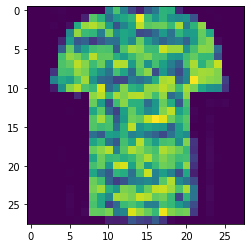

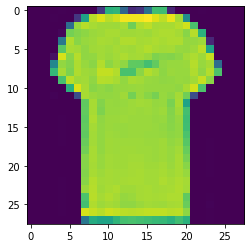

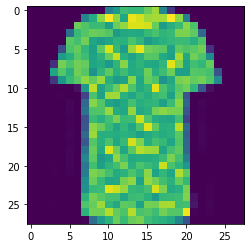

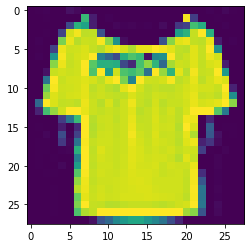

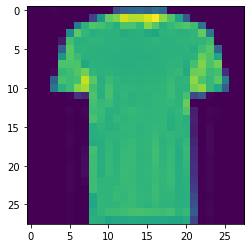

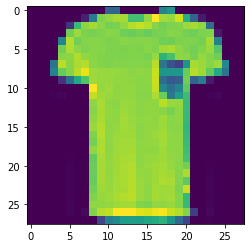

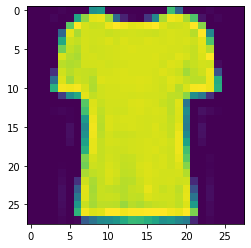

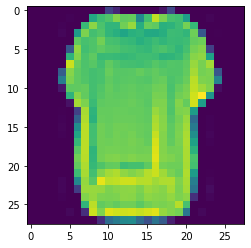

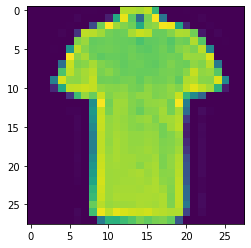

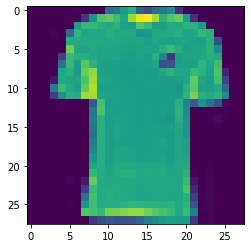


Cluster: 1


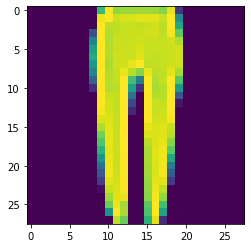

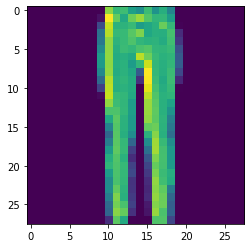

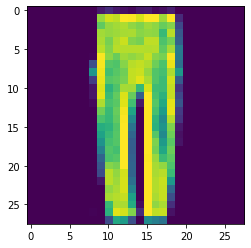

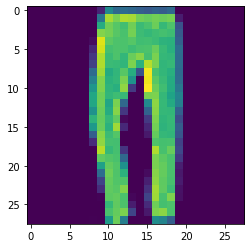

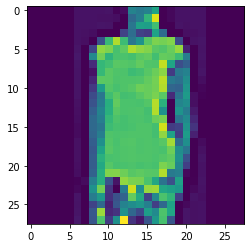

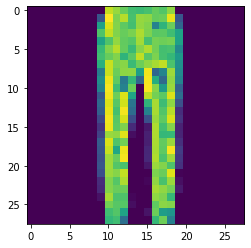

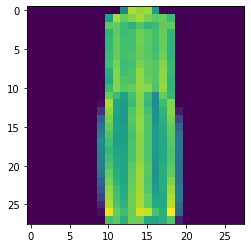

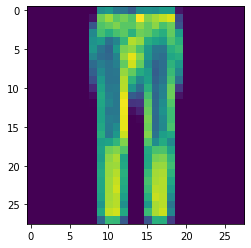

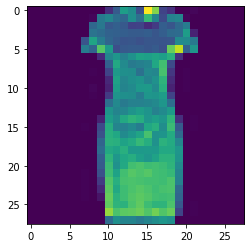

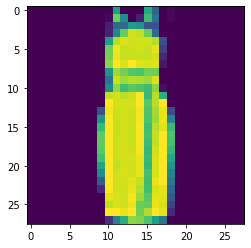


Cluster: 2


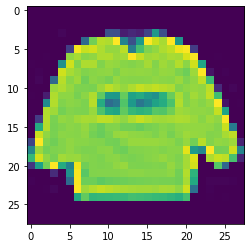

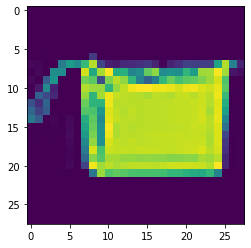

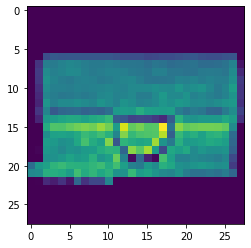

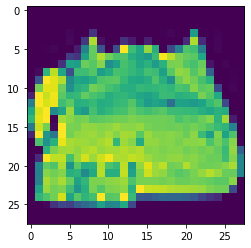

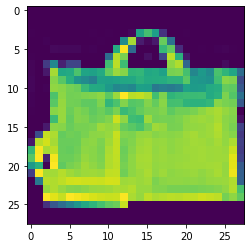

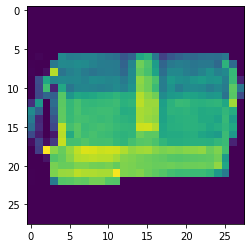

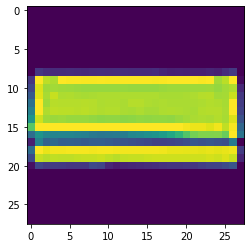

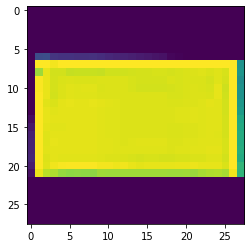

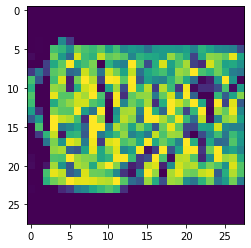

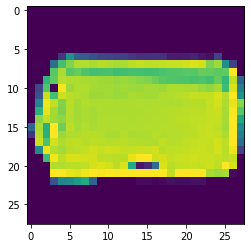


Cluster: 3


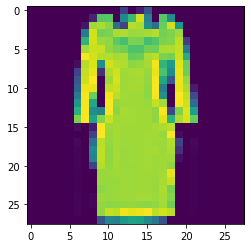

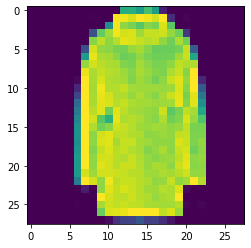

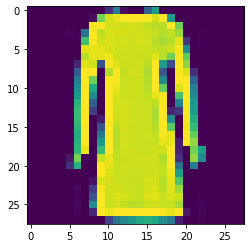

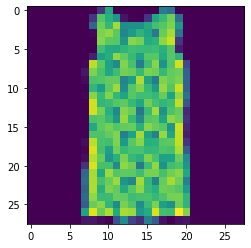

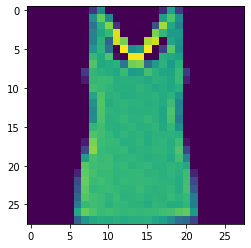

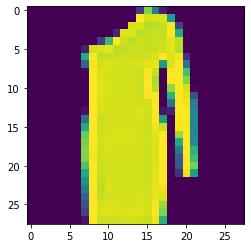

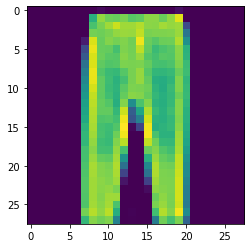

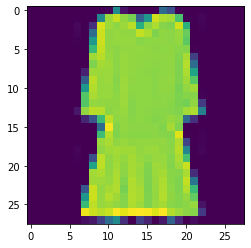

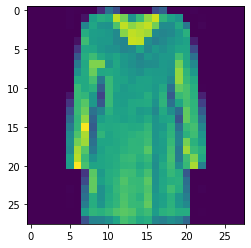

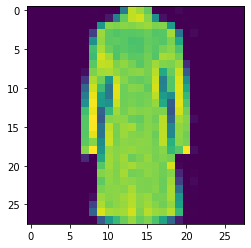


Cluster: 4


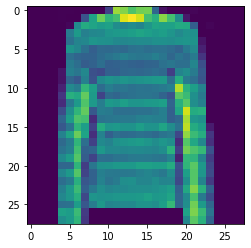

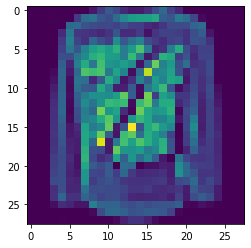

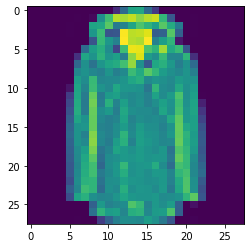

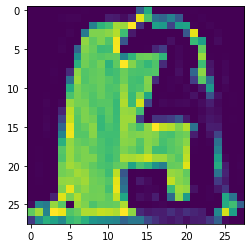

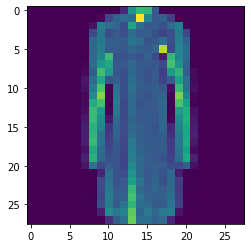

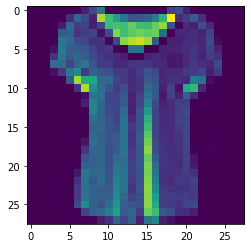

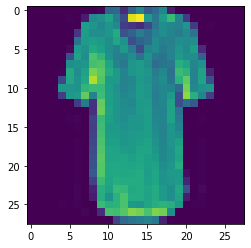

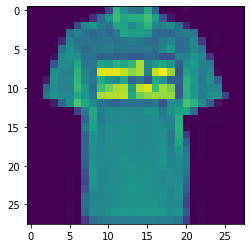

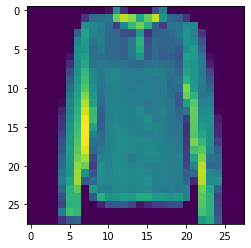

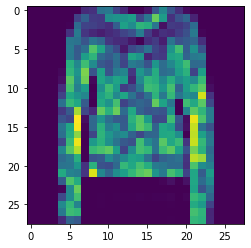


Cluster: 5


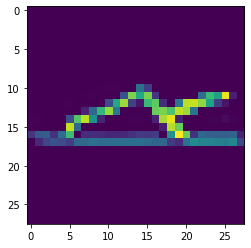

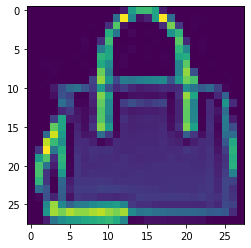

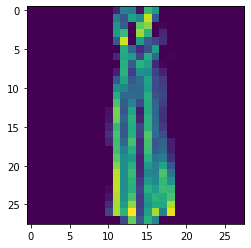

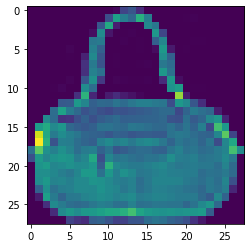

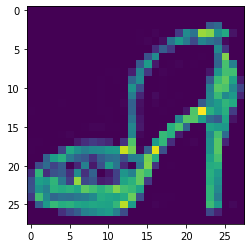

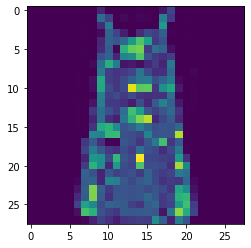

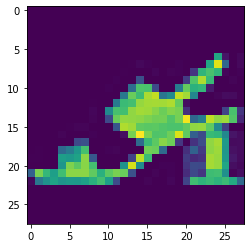

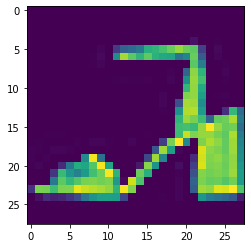

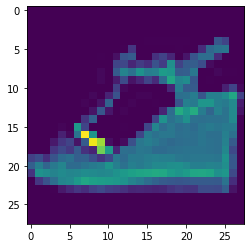

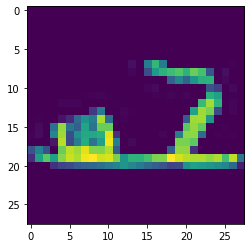


Cluster: 6


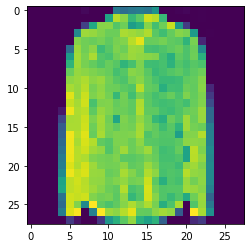

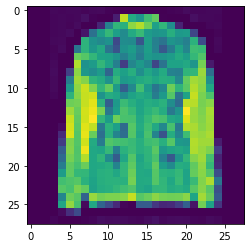

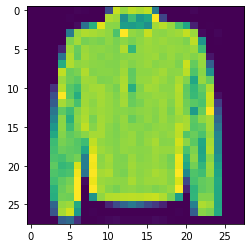

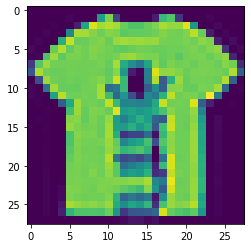

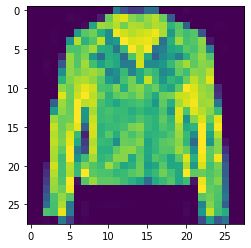

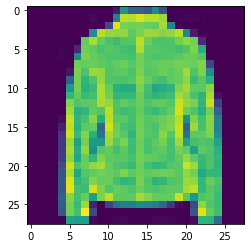

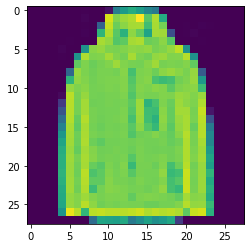

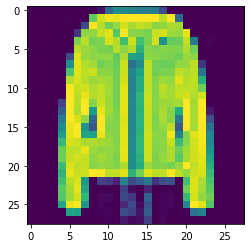

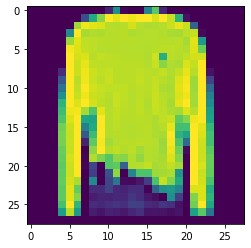

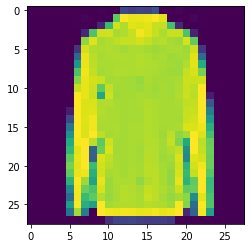


Cluster: 7


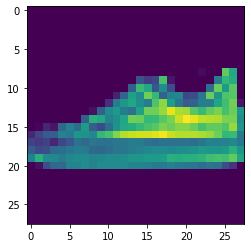

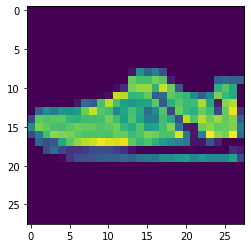

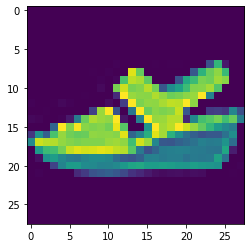

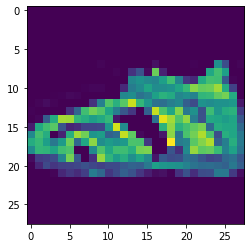

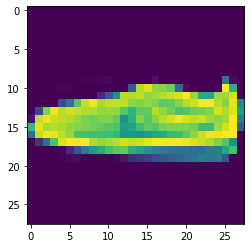

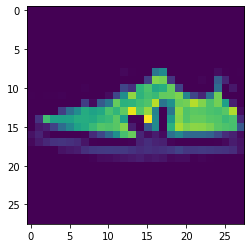

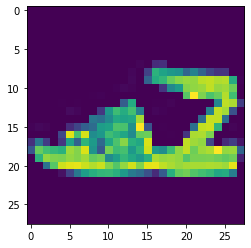

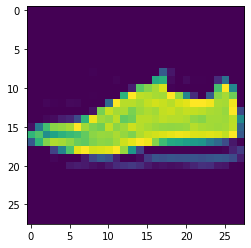

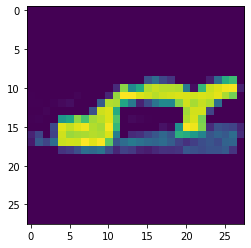

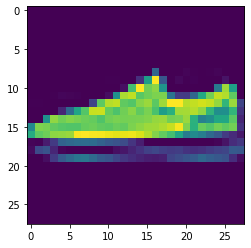


Cluster: 8


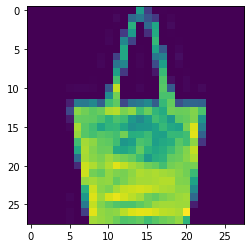

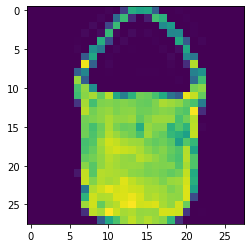

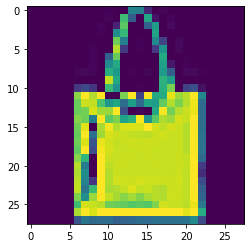

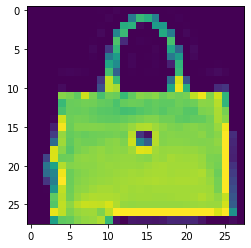

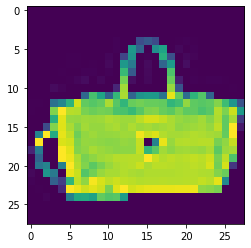

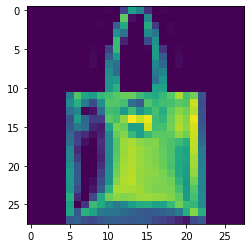

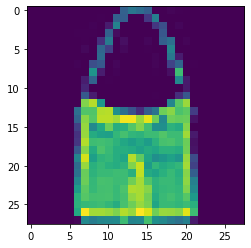

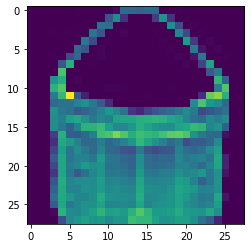

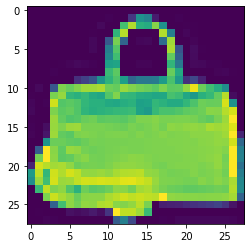

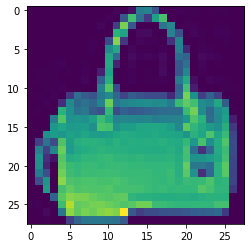


Cluster: 9


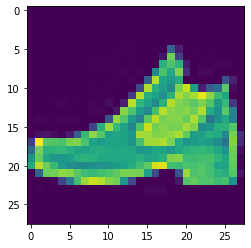

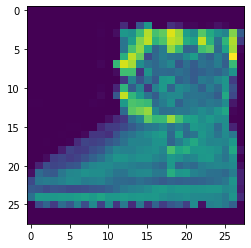

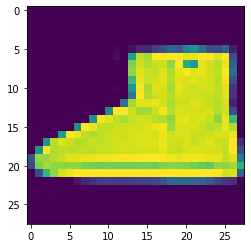

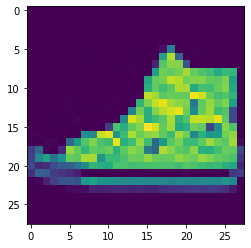

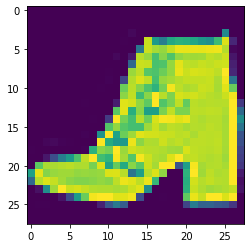

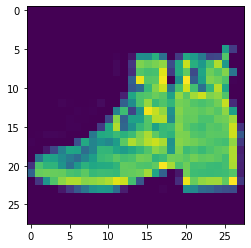

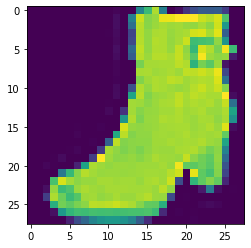

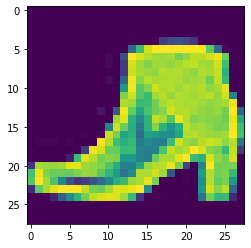

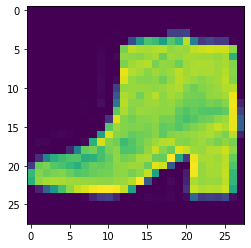

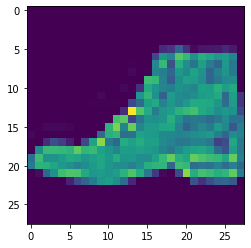

In [ ]:
tempCount = 0
for i in groups: 
  print("Cluster:", tempCount)
  tempCount+=1
  for j in range(10):
    data = np.reshape(i[j],(28,28))
    plt.imshow(data, interpolation='nearest')
    plt.show()
    print()

h]

In [ ]:
df_train.label.value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [ ]:
l = []
for i in range(k):
    l.append([i, len(groups1[i]), len(groups[i]), df_train.label.value_counts()[i]])

pd.DataFrame(l, columns = ['Class', 'Random Centroids', 'Predefined Centroids', 'Original'])

Class  Random Centroids  Predefined Centroids  Original
0      0              2367                  3795      6000
1      1              6325                  7787      6000
2      2              6842                  2351      6000
3      3              3977                  5174      6000
4      4              7365                  7596      6000
5      5             10000                  7650      6000
6      6              5182                  9710      6000
7      7             11196                  7534      6000
8      8              4186                  2571      6000
9      9              2560                  5832      6000

In [ ]:
def SSE(groups):

    sse = 0
    for i in groups:
        tempMean = np.average(i, axis = 0)

        for j in i:
            sse += np.linalg.norm((j - tempMean)**2)
    
    return sse

print(" SSE for Random Centroids:    ", SSE(groups1), "\n", "SSE for Predefined Centroids:", SSE(groups))

 SSE for Random Centroids:     9665560211.678968 
 SSE for Predefined Centroids: 9801052507.755516


#Q3]

In [ ]:
import os
import PIL
import glob
from PIL import Image
from numpy import asarray
import plotly.graph_objects as go
import plotly.express as px

a]

In [ ]:
filePath_no = "/content/drive/MyDrive/archive.zip (Unzipped Files)/no"
filePath_yes = "/content/drive/MyDrive/archive.zip (Unzipped Files)/yes"

images = []
label = []

for i in os.listdir(filePath_no):

    label.append(0)
    temp_i = Image.open(filePath_no + '/' + i)
    data = asarray(temp_i)
    tempImage = Image.fromarray(data)

    tempImage = tempImage.resize((64,64))
    tempImage = tempImage.convert('RGB')
    data = np.array(tempImage)
    images.append(data.reshape(1,12288)[0])

for i in os.listdir(filePath_yes):

    label.append(1)
    temp1_i = Image.open(filePath_yes + '/' + i)
    data = asarray(temp1_i)
    tempImage = Image.fromarray(data)

    tempImage = tempImage.resize((64,64))
    tempImage = tempImage.convert('RGB')
    data = np.array(tempImage)
    images.append(data.reshape(1,12288)[0])


In [ ]:
label[-1]

1

b]

In [ ]:
import plotly.express as pxa
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(images)

fig = pxa.scatter(x = reduced[:,0], y = reduced[:,1], color = label)
fig.show()

c]

NO 



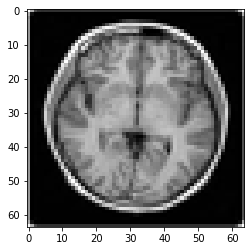

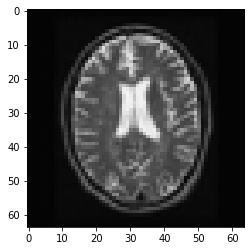

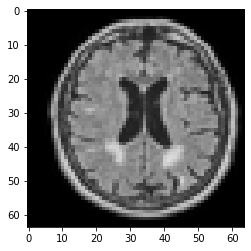

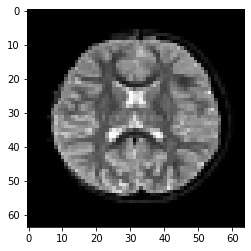

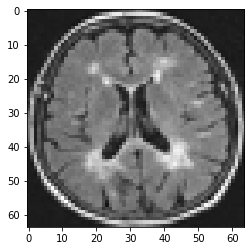

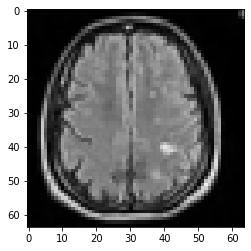

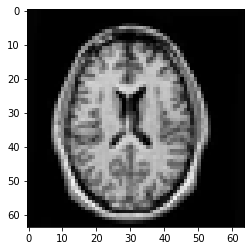

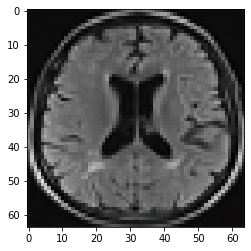

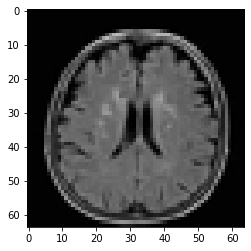

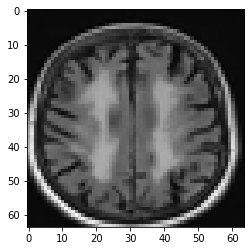

YES 



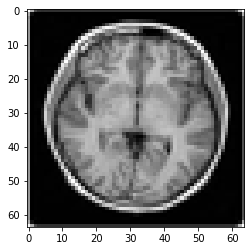

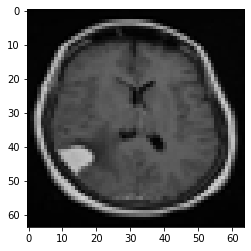

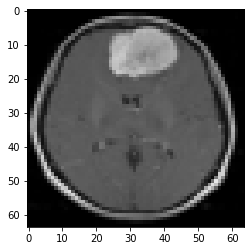

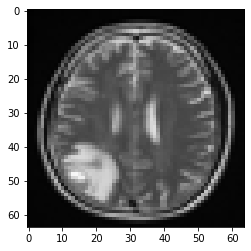

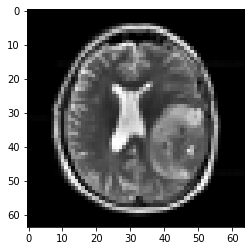

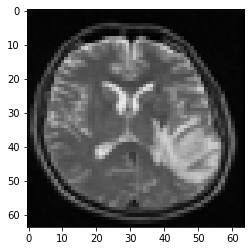

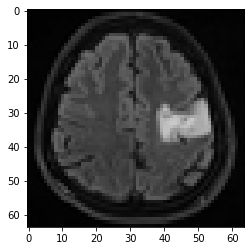

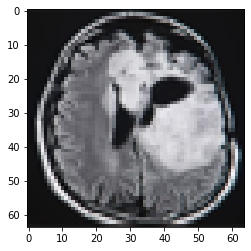

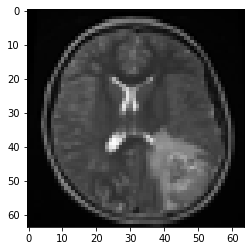

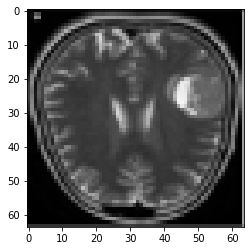

In [ ]:
print("NO \n")
for i in range(10):
    plt.imshow(images[i].reshape(64,64,3), interpolation='nearest')
    plt.show()

print("YES \n")
for i in range(10):
    plt.imshow(images[-1 * i].reshape(64,64,3), interpolation='nearest')
    plt.show()

d]

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
ac_y = ac.fit_predict(images)

ac_y

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
fig = px.scatter(x = reduced[:,0], y = reduced[:,1], color = ac_y)
fig.show()

e]

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(images)

fig = px.scatter(x = reduced[:,0], y=reduced[:,1], color = y_kmeans)
fig.show()

In [ ]:
print("Accuracy by AgglomerativeClustering:", acc(label, ac_y))
print("Accuracy by KMeansClustering:", acc(label, y_kmeans))

Accuracy by AgglomerativeClustering: 0.6323676323676324
Accuracy by KMeansClustering: 0.6636696636696636
